# Extra Credit: Building regularized models for Boston data set
Perform a bias variance analysis of the Boston housing data set with the thirteen predictors, following the steps on the simple data set above. Use sklearn's  built-in functions to split the data into training, validation and test sets. What is the lowest achievable error on the test set with $\lambda = 0$? Select the best value for $\lambda$ and report the test set error with the best $\lambda$. Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. What is the test set error with quadratic features with the best $\lambda$ chosen with the validation set? What is the test set error with cubic features with the best $\lambda$ chosen with the validation set? Put your analysis code in a separate Python script or notebook called bostonexpt.py or bostonexpt.ipynb. Present your results analytically with plots to support your findings. Discuss the impact of regularization for building good models for the Boston housing data set.

## Use sklearn's built-in functions to split the data into training, validation and test sets.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading and Visualizing Data ...


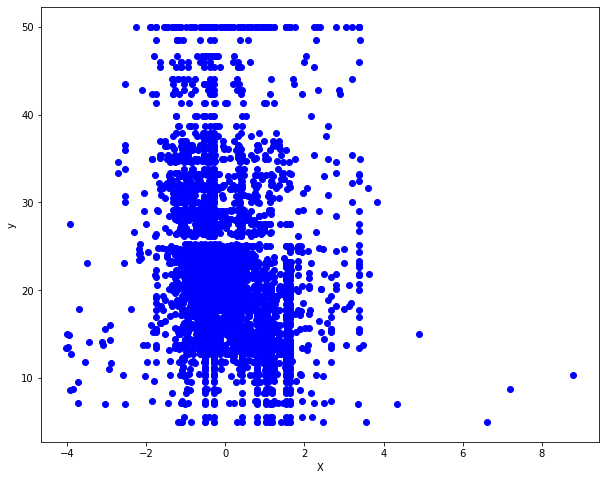

(323, 13) (323,) (81, 13) (81,) (102, 13) (102,)


In [4]:
### TODO: your Boston code here or in a separate notebook.
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import plot_utils
from reg_linear_regressor_multi import RegularizedLinearReg_SquaredLoss

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

########################################################################
## =========== Part 1: Loading and Visualizing Data ===================#
########################################################################
# Load Training Data

print('Loading and Visualizing Data ...')
boston_data = load_boston()
df = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)
df.head()
#split data into train, validation and test dataset
X_train, X_test, y_train, y_test = train_test_split(boston_data.data, boston_data.target, test_size=0.2, random_state=1)
X, X_val, y, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
X, mu, sigma = utils.feature_normalize(X)
X_val = (X_val - mu) / sigma
X_test = (X_test - mu) / sigma
plot_utils.plot_data(X, y, 'X', 'y')
plt.show()
print(X.shape, y.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

## The lowest achievable error on the test set with $\lambda = 0$

In [7]:
# append a column of ones to matrix X

XX = np.vstack([np.ones((X.shape[0],)),X.T]).T

#  Train linear regression with lambda = 0

reglinear_reg1 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = reglinear_reg1.train(XX,y,reg=0.0,num_iters=1000)
print('Theta at lambda = 0 is %s' % (theta_opt0))
XX_test = np.vstack([np.ones((X_test.shape[0],)),X_test.T]).T
test_error = reglinear_reg1.loss(theta_opt0, XX_test, y_test, 0.0)
print('test error is', test_error)

Optimization terminated successfully.
         Current function value: 11.161633
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Theta at lambda = 0 is [22.67461055 -1.16944927  1.63225402  0.38015395  0.64240393 -2.77127208
  1.537281    0.4527835  -3.31781527  2.77056382 -1.70897112 -2.29044199
  0.53350691 -4.43787891]
test error is 12.930601133114878


## Select the best value for  𝜆  and report the test set error with the best  𝜆 

Optimization terminated successfully.
         Current function value: 11.161633
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 11.170546
         Iterations: 25
         Function evaluations: 76
         Gradient evaluations: 65
         Current function value: 11.188371
         Iterations: 25
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 11.250743
         Iterations: 19
         Function evaluations: 60
         Gradient evaluations: 48
         Current function value: 11.428826
         Iterations: 18
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 12.050871
         Iterations: 17
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 13.820412
         Iterations: 18
         Function evaluations: 98
         Gradient evaluations: 86
         Curren

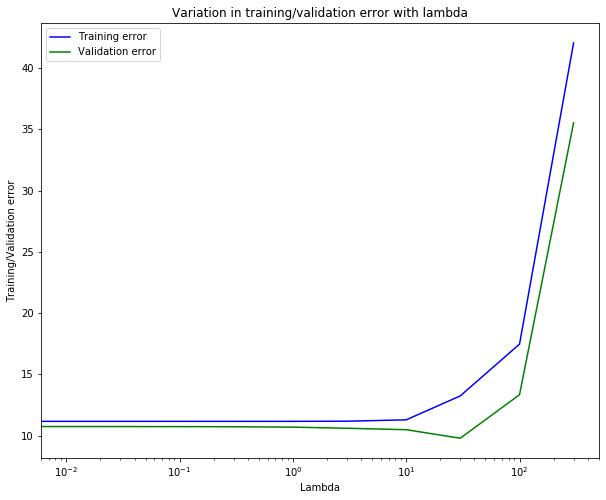

In [10]:
XX_val = np.vstack([np.ones((X_val.shape[0],)),X_val.T]).T
reg_vec, error_train, error_val = utils.validation_curve(XX, y, XX_val, y_val)
plot_utils.plot_lambda_selection(reg_vec, error_train, error_val)
plt.savefig('ex_select_lambda.png')

In [15]:
best_reg = 30.0
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt2 = reglinear_reg2.train(XX,y,reg=best_reg,num_iters=5000)
print('Theta at lambda = %.2f is %s' % (best_reg, theta_opt2))
test_error2 = reglinear_reg2.loss(theta_opt2, XX_test, y_test, 0.0)
print('Test error at lambda = %.2f is %s' % (best_reg, test_error2))

         Current function value: 36.128745
         Iterations: 4
         Function evaluations: 111
         Gradient evaluations: 99
Theta at lambda = 30.00 is [21.67307386 -0.72612095  0.57803302 -0.10995907  0.86130698 -0.67871632
  2.51561331 -0.03763029 -1.25651133  0.51953332 -0.1980644  -1.67655471
  0.70856292 -3.08881471]
Test error at lambda = 30.00 is 13.34301316716897


Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. 

## What is the test set error with quadratic features with the best  𝜆  chosen with the validation set?

Optimization terminated successfully.
         Current function value: 2.868339
         Iterations: 469
         Function evaluations: 476
         Gradient evaluations: 476
Optimization terminated successfully.
         Current function value: 2.891005
         Iterations: 465
         Function evaluations: 472
         Gradient evaluations: 472
Optimization terminated successfully.
         Current function value: 2.923939
         Iterations: 406
         Function evaluations: 413
         Gradient evaluations: 413
Optimization terminated successfully.
         Current function value: 3.020943
         Iterations: 294
         Function evaluations: 301
         Gradient evaluations: 301
Optimization terminated successfully.
         Current function value: 3.261757
         Iterations: 215
         Function evaluations: 222
         Gradient evaluations: 222
         Current function value: 4.016481
         Iterations: 104
         Function evaluations: 176
         Gradient evalu

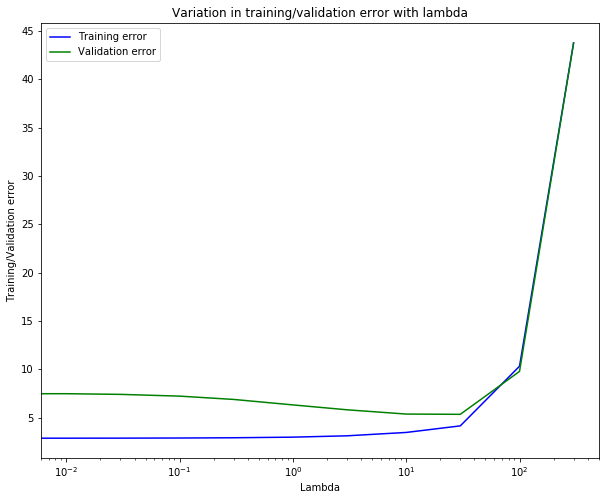

In [14]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)

X_poly = poly.fit_transform(X)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)

X_poly, mu_poly, sigma_poly = utils.feature_normalize(X_poly)
X_poly_val = (X_poly_val - mu_poly) / sigma_poly
X_poly_test = (X_poly_test - mu_poly) / sigma_poly

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T

reg_vec, error_train, error_val = utils.validation_curve(XX_poly, y, XX_poly_val, y_val)
plot_utils.plot_lambda_selection(reg_vec, error_train, error_val)
plt.savefig('ex_select_lambda_poly.png')

In [16]:
best_reg_poly = 30.0
reglinear_reg3 = RegularizedLinearReg_SquaredLoss()
theta_opt3 = reglinear_reg3.train(XX_poly,y,reg=best_reg_poly,num_iters=5000)
print('Theta at lambda = %.2f is %s' % (best_reg_poly, theta_opt3))
test_error3 = reglinear_reg3.loss(theta_opt3, XX_poly_test, y_test, 0.0)
print('Test error at lambda = %.2f is %s' % (best_reg, test_error3))

         Current function value: 29.831453
         Iterations: 26
         Function evaluations: 123
         Gradient evaluations: 111
Theta at lambda = 30.00 is [ 2.26741785e+01 -2.07506430e-01  1.12204113e-01 -2.67836188e-01
  6.35289173e-01 -7.45888336e-01  2.81487064e+00 -6.76437876e-01
 -1.28006371e+00  3.18212417e-01 -4.83371641e-01 -8.37514821e-01
  5.01670036e-01 -2.72822626e+00  4.28648905e-01  1.25332861e-01
 -2.95700883e-02  9.20357340e-01 -2.78345958e-01  4.63042772e-01
  2.87217150e-02  2.91876177e-01 -3.05469808e-01 -6.22269742e-02
  8.05048089e-02 -1.63836514e-01  1.50385577e-01  1.83957006e-01
 -4.31015107e-02  8.67922971e-02  1.71008913e-01  3.52671194e-01
  1.15031782e-01 -9.03626047e-02  9.51864934e-02  3.21402978e-02
  2.16401436e-01  1.93461954e-02 -1.86823909e-01  2.58261505e-01
  1.49319148e-01  2.70177131e-01 -1.49464492e-01  5.70369292e-01
  7.04575317e-02  1.86447509e-02 -1.49439462e-01 -5.39212547e-01
 -2.92547134e-02 -5.86944023e-01  6.35289173e-01 -1.1394

## What is the test set error with cubic features with the best  𝜆  chosen with the validation set?

         Current function value: 0.010649
         Iterations: 1000
         Function evaluations: 1006
         Gradient evaluations: 1006
Optimization terminated successfully.
         Current function value: 1.889954
         Iterations: 157
         Function evaluations: 163
         Gradient evaluations: 163
         Current function value: 3.977110
         Iterations: 96
         Function evaluations: 173
         Gradient evaluations: 161
         Current function value: 10.243821
         Iterations: 73
         Function evaluations: 152
         Gradient evaluations: 140
         Current function value: 27.055181
         Iterations: 39
         Function evaluations: 143
         Gradient evaluations: 131
         Current function value: 84.244033
         Iterations: 24
         Function evaluations: 95
         Gradient evaluations: 84
         Current function value: 245.974386
         Iterations: 22
         Function evaluations: 124
         Gradient evaluations: 112
  

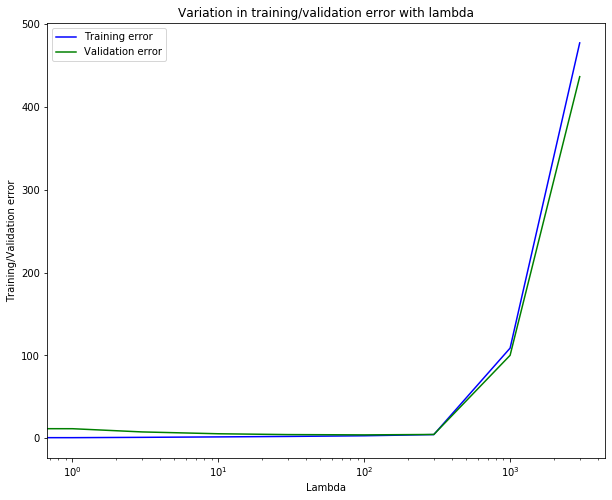

In [18]:
degree = 3
poly = PolynomialFeatures(degree=degree, include_bias=False)

X_poly = poly.fit_transform(X)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)

X_poly, mu_poly, sigma_poly = utils.feature_normalize(X_poly)
X_poly_val = (X_poly_val - mu_poly) / sigma_poly
X_poly_test = (X_poly_test - mu_poly) / sigma_poly

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T

reg_vec, error_train, error_val = utils.validation_curve(XX_poly, y, XX_poly_val, y_val)
plot_utils.plot_lambda_selection(reg_vec, error_train, error_val)
plt.savefig('ex_select_lambda_poly2.png')

In [20]:
best_reg_poly = 300.0
reglinear_reg4 = RegularizedLinearReg_SquaredLoss()
theta_opt4 = reglinear_reg4.train(XX_poly,y,reg=best_reg_poly,num_iters=5000)
print('Theta at lambda = %.2f is %s' % (best_reg_poly, theta_opt4))
test_error4 = reglinear_reg4.loss(theta_opt4, XX_poly_test, y_test, 0.0)
print('Test error at lambda = %.2f is %s' % (best_reg_poly, test_error4))

         Current function value: 245.974386
         Iterations: 22
         Function evaluations: 134
         Gradient evaluations: 122
Theta at lambda = 300.00 is [ 2.26570459e+01 -5.32938177e-02  2.34729269e-02 -4.94472305e-02
  8.93965013e-02 -1.10544001e-01  5.70944294e-01 -2.04108426e-01
 -1.53577454e-01  2.85802781e-02 -8.17033111e-02 -3.41052296e-01
  9.05522083e-02 -5.68542351e-01  3.32908498e-02  3.24426633e-02
 -2.27810853e-02  5.67794569e-02 -2.91818944e-02 -1.72529045e-01
  4.95012604e-02  4.92573418e-02 -5.37707865e-02 -2.27262972e-02
  9.73150189e-02 -2.91180356e-02  1.07753688e-01  2.01982543e-02
  1.32341609e-02 -4.60280925e-02  5.31789638e-02 -7.48988993e-02
  4.01066801e-02  9.27384838e-03 -1.09618774e-02  3.58485441e-02
  1.28898138e-01 -5.32001159e-02  1.98241572e-01  1.32796076e-01
  1.84802481e-02 -3.14743906e-02 -3.00967718e-01  1.46599190e-01
  2.63115044e-02 -4.57434420e-02  2.81385549e-02 -5.32279666e-02
 -1.37293967e-03 -9.74819812e-02  8.93965013e-02 -9.95